<a href="https://colab.research.google.com/github/Lucasnobrepro/Machine-Learning/blob/master/Classifica%C3%A7%C3%A3o_de_Sons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Baixando Dados**

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lucasnobre","key":"fa5e94126492ca9fe9f4a0acba27b6d3"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           4480  
thegurus/spanish-high-speed-rail-system-ticket-pricing  Spanish High Speed Rail tickets pricing - Renfe    27MB  2019-05-10 06:50:30           1131  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21           1800  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32           1767  
taniaj/australian-election-2019-tweets                  Australian Election 2019 Tweets             

In [0]:
!kaggle datasets download -d pavansanagapati/urban-sound-classification

urban-sound-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


## **Extraindo arquivos**

In [0]:
import zipfile       

In [0]:
sound_urban = zipfile.ZipFile('/content/urban-sound-classification.zip') #-Pego o arquivo para descopactar.
sound_urban.extractall('/content')#----------------------------------------Local que será descopactado.
 
sound_urban.close()#-------------------------------------------------------Fechando arquivo.

Extraindo dados de treinamento.

In [0]:
train_sound = zipfile.ZipFile('/content/train.zip') #-Pego o arquivo para descopactar.
train_sound.extractall('/content')#----------------------------------------Local que será descopactado.
 
train_sound.close()#-------------------------------------------------------Fechando arquivo.

Extraindo dados de predição.

In [0]:
test_sound = zipfile.ZipFile('/content/test.zip') #-Pego o arquivo para descopactar.
test_sound.extractall('/content')#----------------------------------------Local que será descopactado.
 
test_sound.close()#-------------------------------------------------------Fechando arquivo.

**Bibliotecas**

In [0]:
!pip install soundfile
!mkdir /content/espc

Classificação de audio utilizando algoritmos de Ma


## **Urban Sound Classification**
A classificação automática de som ambiental é um campo de pesquisa em crescimento com múltiplas aplicações para indexação e recuperação de multimídia baseada em conteúdo em larga escala. Em particular, a análise sonora de ambientes urbanos é objeto de crescente interesse, parcialmente possibilitado por redes de sensores multimídia, bem como por grandes quantidades de conteúdo multimídia on-line que retrata cenas urbanas.

### **Existem basicamente dois grandes desafios com a pesquisa sonora urbana**
Falta de dados de áudio rotulados. Trabalhos anteriores se concentraram em áudio de filmes produzidos cuidadosamente ou faixas de televisão de ambientes específicos, como elevadores ou escritórios e em conjuntos de dados comerciais ou proprietários. O grande esforço envolvido na anotação manual de dados do mundo real significa que os conjuntos de dados baseados em gravações de campo tendem a ser relativamente pequenos (por exemplo, o conjunto de dados de detecção de eventos do IEEE AASP Challenge consiste em 24 gravações por cada uma das 17 classes).

Falta de vocabulário comum ao trabalhar com sons urbanos. Isso significa que a classificação dos sons em grupos semânticos pode variar de estudo para estudo, dificultando a comparação de resultados



In [0]:
#--Informações sobre o sistema operacional
import os
#-Executar cálculos
import numpy as np
#-Análise de dados
import pandas as pd

#-Librosa biblioteca especializada.
import librosa
#-Librosa display serve para plotagem de informação do audio.
import librosa.display
#-librosa fails when reading files on Kaggle.
import soundfile as sf 
#-Show audio.
import IPython.display as ipd

#-Plotagem.
import matplotlib.pyplot as plt
#-Plotagem de imagem.
import matplotlib.image as mpimg

#-Obter uma listagem de diretório.
from glob import glob

#-Dividir dados em treino e teste.
from sklearn.model_selection import train_test_split
#-Padroniza os dados.
from sklearn.preprocessing import StandardScaler
#-Diminuir dimensões 
from sklearn.decomposition import PCA
#-Modelo de classificação com os vizinhos mais proximos.
from sklearn.neighbors import KNeighborsClassifier
#-Grid.
from sklearn.model_selection import GridSearchCV
#-Retorna a matrix de confusão.
from sklearn.metrics import confusion_matrix

#-Normalização.
from sklearn.preprocessing import minmax_scale

## **Sinal de audio**
O sinal de áudio é um sinal tridimensional no qual três eixos representam tempo, amplitude e frequência.

![alt text](https://data.crazyengineers.com/old-attachments/1/1452-time_vs_freq1.gif)

**.load** carrega um arquivo de áudio e o decodifica em uma matriz unidimensional, que é uma série temporal **x** , e **sr** é uma taxa de amostragem de **x**.

In [0]:
audio_path = '/content/Train/1006.wav'
x, sr = librosa.load(audio_path)
print(type(x),type(sr),'\n')
print('x: ', x)
print('\nO default de sr:', sr)

<class 'numpy.ndarray'> <class 'int'> 

x:  [ 0.01636657  0.04526095  0.0555357  ... -0.02428951  0.01990387
  0.02903293]

O default de sr: 22050


### **Tocando um audio**

In [0]:
ipd.Audio (audio_path)

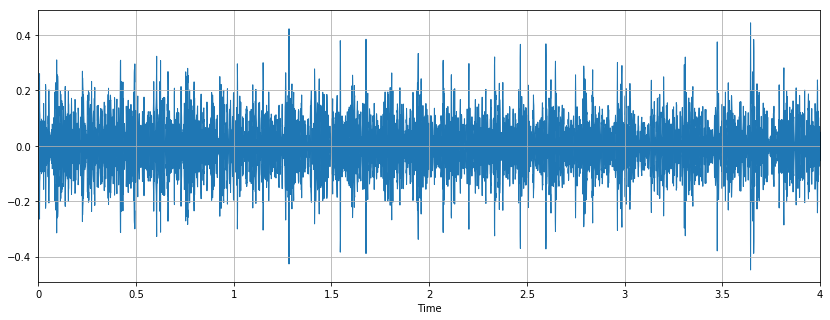

In [0]:
#display waveform 
plt.figure (figsize = (14, 5)) 
librosa.display.waveplot(x,sr=sr);#-Plota a onda
#---------------------------------- Em y se encontra a amplitude do audio e em x o tempo.
plt.grid()#-------------------------Coloca grade no plot.

## **Extração de features**

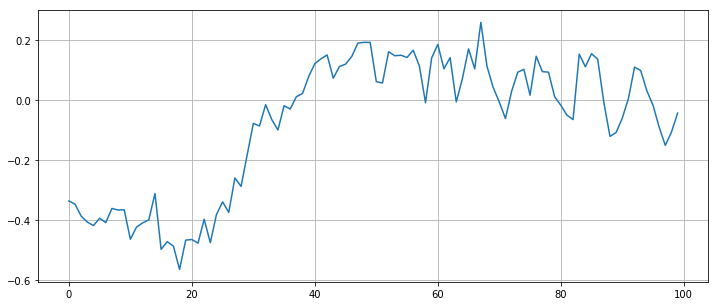

In [0]:
plt.figure(figsize=(12, 5))#-Gero uma figura e defino sua escala.
plt.plot(x[2000:2100]);#-----Zoom em uma parte da plotagem de onda.
plt.grid()#------------------Plota uma grade.

A taxa de cruzamento zero é a taxa de mudanças de sinal ao longo de um sinal, isto é, a taxa na qual o sinal muda de positivo para negativo ou de volta. Esse recurso tem sido usado intensamente no reconhecimento de fala e na recuperação de informações musicais. Geralmente tem valores mais altos para sons altamente percussivos, como aqueles em metal e rock.













In [0]:
zero_crossings = librosa.zero_crossings (x [2000: 2100], pad = False) 
print (sum (zero_crossings))

12


### **Centroid espectral**
Indica onde o “centro de massa” de um som está localizado e é calculado como a média ponderada das freqüências presentes no som. Se as frequências da música forem iguais durante todo o tempo, o centróide espectral estará em torno de um centro e, se houver altas frequências no final do som, o centróide estará em seu final.

Centroids Shape: (173,)
Primeiras 3 centroids: [2005.82703487 1986.74779741 1991.85051938]


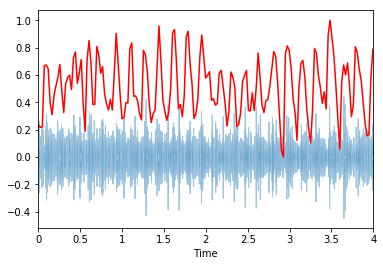

In [0]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape #retornará uma matriz com colunas iguais a um número de quadros presentes em sua amostra.

# Computando a variável de tempo para visualização
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)#converte frames em times-> frame[i] == time[i]

# Normalizando o centróide espectral para visualização
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

#Plotando a centroids na forma de onda
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r');

print(f'Centroids Shape: {spectral_centroids.shape}')
print(f'Primeiras 3 centroids: {spectral_centroids[:3]}')

É calculado como a média ponderada das frequências presentes no sinal, determinada usando uma transformada de Fourier , com suas magnitudes como os pesos:

$$Centroid = \dfrac{\sum_{n=0}^{N-1} f(n) x (n)}{\sum_{n=0}^{N-1}x (n)}$$

em que x (n) representa o valor ponderado frequência, ou magnitude, de bin número N , e f (n) representa a frequência central de cada reservatório.

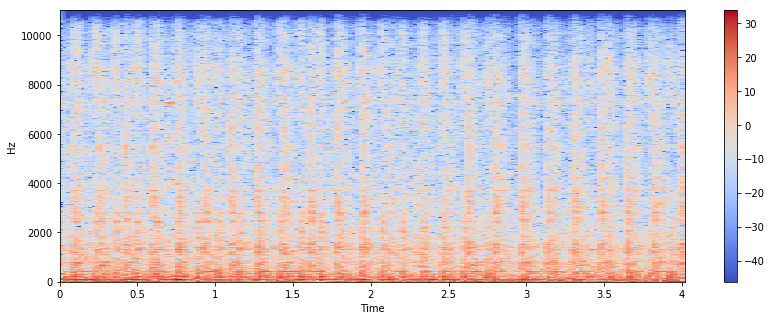

In [0]:
X_espc = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X_espc))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 

#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

## **MFCC — Mel-Frequency Cepstral Coefficients**
Esse recurso é um dos métodos mais importantes para extrair um recurso de um sinal de áudio e é usado majoritariamente sempre que se trabalha com sinais de áudio. Os coeficientes cepstrais da frequência de mel (MFCCs) de um sinal são um pequeno conjunto de características (geralmente cerca de 10–20) que descrevem de forma concisa a forma geral de um envelope espectral.

A técnica de extração de atributos Mel-Frequency Cepstral Coefficients (MFCC) faz uma análise de caracteríısticas espectrais de tempo curto, baseando-se no uso do espectro da voz convertido para uma escala de frequências denominada MEL que é uma escala que visa imitar as características únicas perceptíveis pelo ouvido humano. 





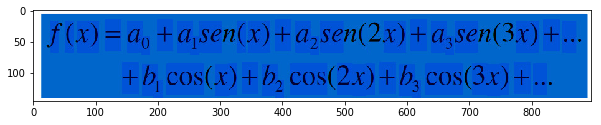

In [0]:
plt.figure(figsize=(10,10))
img=mpimg.imread('/content/36c3b4cb-98df-4140-86de-aa964cb8b7ab.jfif')
imgplot = plt.imshow(img)

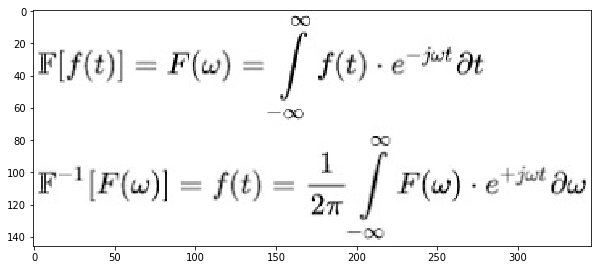

In [0]:
plt.figure(figsize=(10,10))
img=mpimg.imread('/content/49987cfc-e3a1-477f-a32b-8384c560c961.jfif')
imgplot = plt.imshow(img)

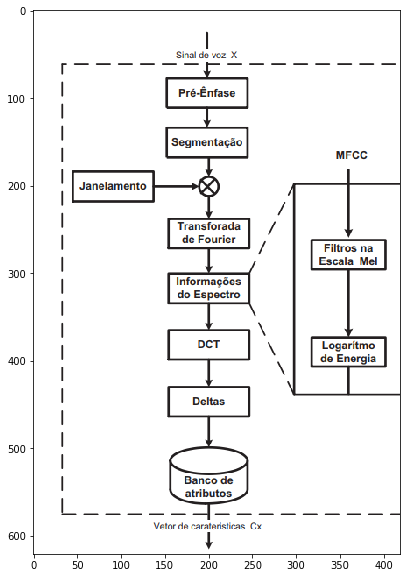

In [0]:
plt.figure(figsize=(10,10))
img=mpimg.imread('/content/mffc_fluxo.PNG')
imgplot = plt.imshow(img)


 

1.   Compensar a atenuação das componentes.
2.   Segmentação.

1.    Atenuar as descontinuidades causadas no início e no final do sinal de cada segmento.
2.   Transformada de Fourier.

1.   Aplica-se um banco de M filtros à potência espectral.

2.  Aplicando a transformada inversa do cosseno (DCT).

1.   Captar as mudanças temporais bruscas 


Estes coeficientes são uma representacão definida como o cepstrum de um sinal janelado no tempo, que tem sido derivado da aplicacão da DFT, em escalas de frequência não lineares.

In [0]:
train_id = pd.read_csv('/content/train.csv')#--Arquivo csv com id dos audioe de treino.
test_id  = pd.read_csv('/content/test.csv')#---Arquivo csv com id dos audioe de teste==

#`Criação do Modelo`**


In [0]:
def mean_mfccs(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios():
    train_path = "/content/Train/"
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    
    samples = []
    for file_name in train_file_names:
        x, sr = sf.read(train_path + file_name, always_2d=True)
        #x, sr = librosa.load(audio_path)
        x = parse_audio(x)
        samples.append(mean_mfccs(x))
        
    return np.array(samples)

def get_samples():
    df = pd.read_csv('/content/train.csv')
    return get_audios(), df['Class'].values
  
#Função que cria os espectogramas
def get_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[0.72,0.72])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename  = '/content/espc/' + name + '.jpg'
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

Pegando os X e Y das amostras onde o  X é composto da media das MFCC's de cada amostra e Y são as labels correspondentes.

In [0]:
X, Y = get_samples()

Separando os dados de treino e de teste.

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)

In [0]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4076, 20), (1359, 20), (4076,), (1359,))

**Criando espectogramas.**

Aqui eu crio um espectograma para cada audio de treino.

In [0]:
Data_dir=np.array(glob("/content/Train/*"))
i=1500
for file in Data_dir[i:i+1500]:
    filename,name = file,file.split('/')[-1].split('.')[0]
    get_spectrogram(filename,name)

In [0]:
Data_dir.shape

(5435,)

**Padronizando os Dados**

In [0]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Treinando modelo KNN.

In [0]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1);
model.fit(x_train_scaled, y_train);

In [0]:
print(f'Model Score: {model.score(x_test_scaled, y_test)}')

y_predict = model.predict(x_test_scaled)
print(f'Confusion Matrix: \n{confusion_matrix(y_predict, y_test)}')

Model Score: 0.9293598233995585
Confusion Matrix: 
[[140   3   1   3   1   1   1   0   0   2]
 [  0  45   0   1   1   0   2   0   0   0]
 [  0   3 146   6   3   0   4   0   2   2]
 [  0   1   0 112   1   0   4   0   2   2]
 [  0   4   0   4 126   1   0   0   0   0]
 [  0   0   3   0   1 160   0   0   0   1]
 [  0   0   1   5   1   2  64   0   1   1]
 [  0   1   1   1   0   0   0 173   0   0]
 [  0   0   0   4   1   1   0   0 172   1]
 [  0   3   5   2   0   1   1   3   0 125]]


In [0]:

!pip install pydub
from pydub import AudioSegment
sound = AudioSegment.from_mp3("/content/Pistola22cal.mp3")
sound.export("/content/pred.wav", format="wav");

In [0]:
we

In [0]:
def mean_mfccs_2(x):
    return [np.mean(feature) for feature in librosa.feature.mfcc(x)]

def parse_audio_2(x):
    return x.flatten('F')[:x.shape[0]] 

def get_audios_2():
    train_path = "/content/Train/"
    train_file_names = os.listdir(train_path)
    train_file_names.sort(key=lambda x: int(x.partition('.')[0]))
    

samples = []
    
x, sr = sf.read('/content/pred.wav', always_2d=True)
#x, sr = librosa.load(audio_path)
x = parse_audio_2(x)
samples.append(mean_mfccs_2(x))
        
mfcc =  np.array(samples)

mfcc_scaler = scaler.transform(mfcc)

In [0]:
model.predict(mfcc_scaler)

array(['gun_shot'], dtype=object)

In [0]:
ipd.Audio ('/content/pred.wav')

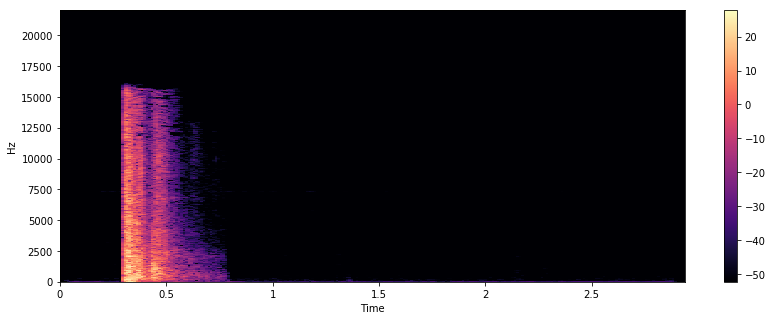

In [0]:
X_espc = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X_espc))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') 

#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar();

In [0]:
train_id

,ID,Class
0,0,siren
1,1,street_music
2,2,drilling
3,3,siren
4,4,dog_bark
5,6,children_playing
6,10,street_music
7,11,drilling
8,12,gun_shot
9,15,dog_bark
